In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_path = "results.csv"
results = pd.read_csv(results_path)

In [3]:
# from src.datasets import SurvivalDataset
# from src.survival_runner import SurvivalResult
# import numpy as np

# DS_TEST_PATH = "data/test_full_light.pkl"
# ds_test = SurvivalDataset(DS_TEST_PATH, score_name="toxicity", threshold=0.5)

In [4]:
# ds_test.data[0]

In [5]:
# for r in ds_test.data:
#     r.ratings = r.ratings[::-1]

# # load test set survival times
# test_t_tilde = np.asanyarray([y[0] for (x, y) in ds_test]).flatten().astype(np.int64)

In [6]:
# plt.figure(figsize=(20, 10))
# plt.hist(test_t_tilde, bins=200, alpha=0.5, color="blue", label="test t_tilde")
# plt.xlabel("t_tilde")
# plt.ylabel("Frequency")
# plt.title("Histogram of test t_tilde")
# plt.legend()
# plt.grid()

In [7]:
import torch
import numpy as np


MIN_TAU_EXP = -8
MAX_TAU_EXP = -0.33
NUM_TAUS = 500
TAUS_RANGE = torch.tensor(np.logspace(MIN_TAU_EXP, MAX_TAU_EXP, NUM_TAUS))

print(TAUS_RANGE[TAUS_RANGE > 0.1])

tensor([0.1021, 0.1058, 0.1096, 0.1135, 0.1176, 0.1219, 0.1263, 0.1308, 0.1355,
        0.1404, 0.1455, 0.1507, 0.1561, 0.1618, 0.1676, 0.1736, 0.1799, 0.1864,
        0.1931, 0.2000, 0.2072, 0.2147, 0.2224, 0.2305, 0.2388, 0.2474, 0.2563,
        0.2655, 0.2751, 0.2850, 0.2952, 0.3059, 0.3169, 0.3283, 0.3401, 0.3524,
        0.3651, 0.3782, 0.3919, 0.4060, 0.4206, 0.4358, 0.4515, 0.4677],
       dtype=torch.float64)


In [8]:
display(results)

,exp_name,exp_min_sample_size,exp_share_budget,exp_naive,exp_budget,exp_run_num,tau_hat,max_est,cal_hours,cal_mean_generated_samples,cal_mean_c_value,cal_miscoverage,test_miscoverage,test_mean_lpb,test_hours
0,Global Budgeting,0.5,True,False,10,0,0.420618,20,0.114,9.407834,9.976016,0.099229,0.107195,16.068631,0.009
1,Global Budgeting,0.5,True,False,50,0,0.200033,100,0.332,45.568383,50.146973,0.099513,0.094374,52.135251,0.009
2,Global Budgeting,0.5,True,False,200,0,0.156137,400,0.683,166.016844,187.694338,0.098753,0.088290,122.681030,0.003
3,Global Budgeting,0.5,True,False,10,1,0.405992,20,0.069,9.459574,10.036203,0.099927,0.104832,16.000201,0.003
4,Global Budgeting,0.5,True,False,50,1,0.193077,100,0.198,45.585479,50.236877,0.097968,0.092413,51.615013,0.003
5,Global Budgeting,0.5,True,False,200,1,0.156137,400,0.641,165.916533,187.694338,0.099759,0.088290,122.681030,0.003
6,Global Budgeting,0.5,True,False,10,2,0.405992,20,0.069,9.451881,10.009956,0.098830,0.104832,16.000201,0.003
7,Global Budgeting,0.5,True,False,50,2,0.193077,100,0.202,45.354234,50.016543,0.099176,0.092413,51.615013,0.003
8,Global Budgeting,0.5,True,False,200,2,0.150708,400,0.649,165.897828,187.694338,0.099809,0.085977,120.875962,0.003
9,Global Budgeting,0.5,True,False,10,3,0.405992,20,0.069,9.399588,9.957864,0.097807,0.104832,16.000201,0.003


In [9]:
print(results.columns.to_list())

['exp_name', 'exp_min_sample_size', 'exp_share_budget', 'exp_naive', 'exp_budget', 'exp_run_num', 'tau_hat', 'max_est', 'cal_hours', 'cal_mean_generated_samples', 'cal_mean_c_value', 'cal_miscoverage', 'test_miscoverage', 'test_mean_lpb', 'test_hours']


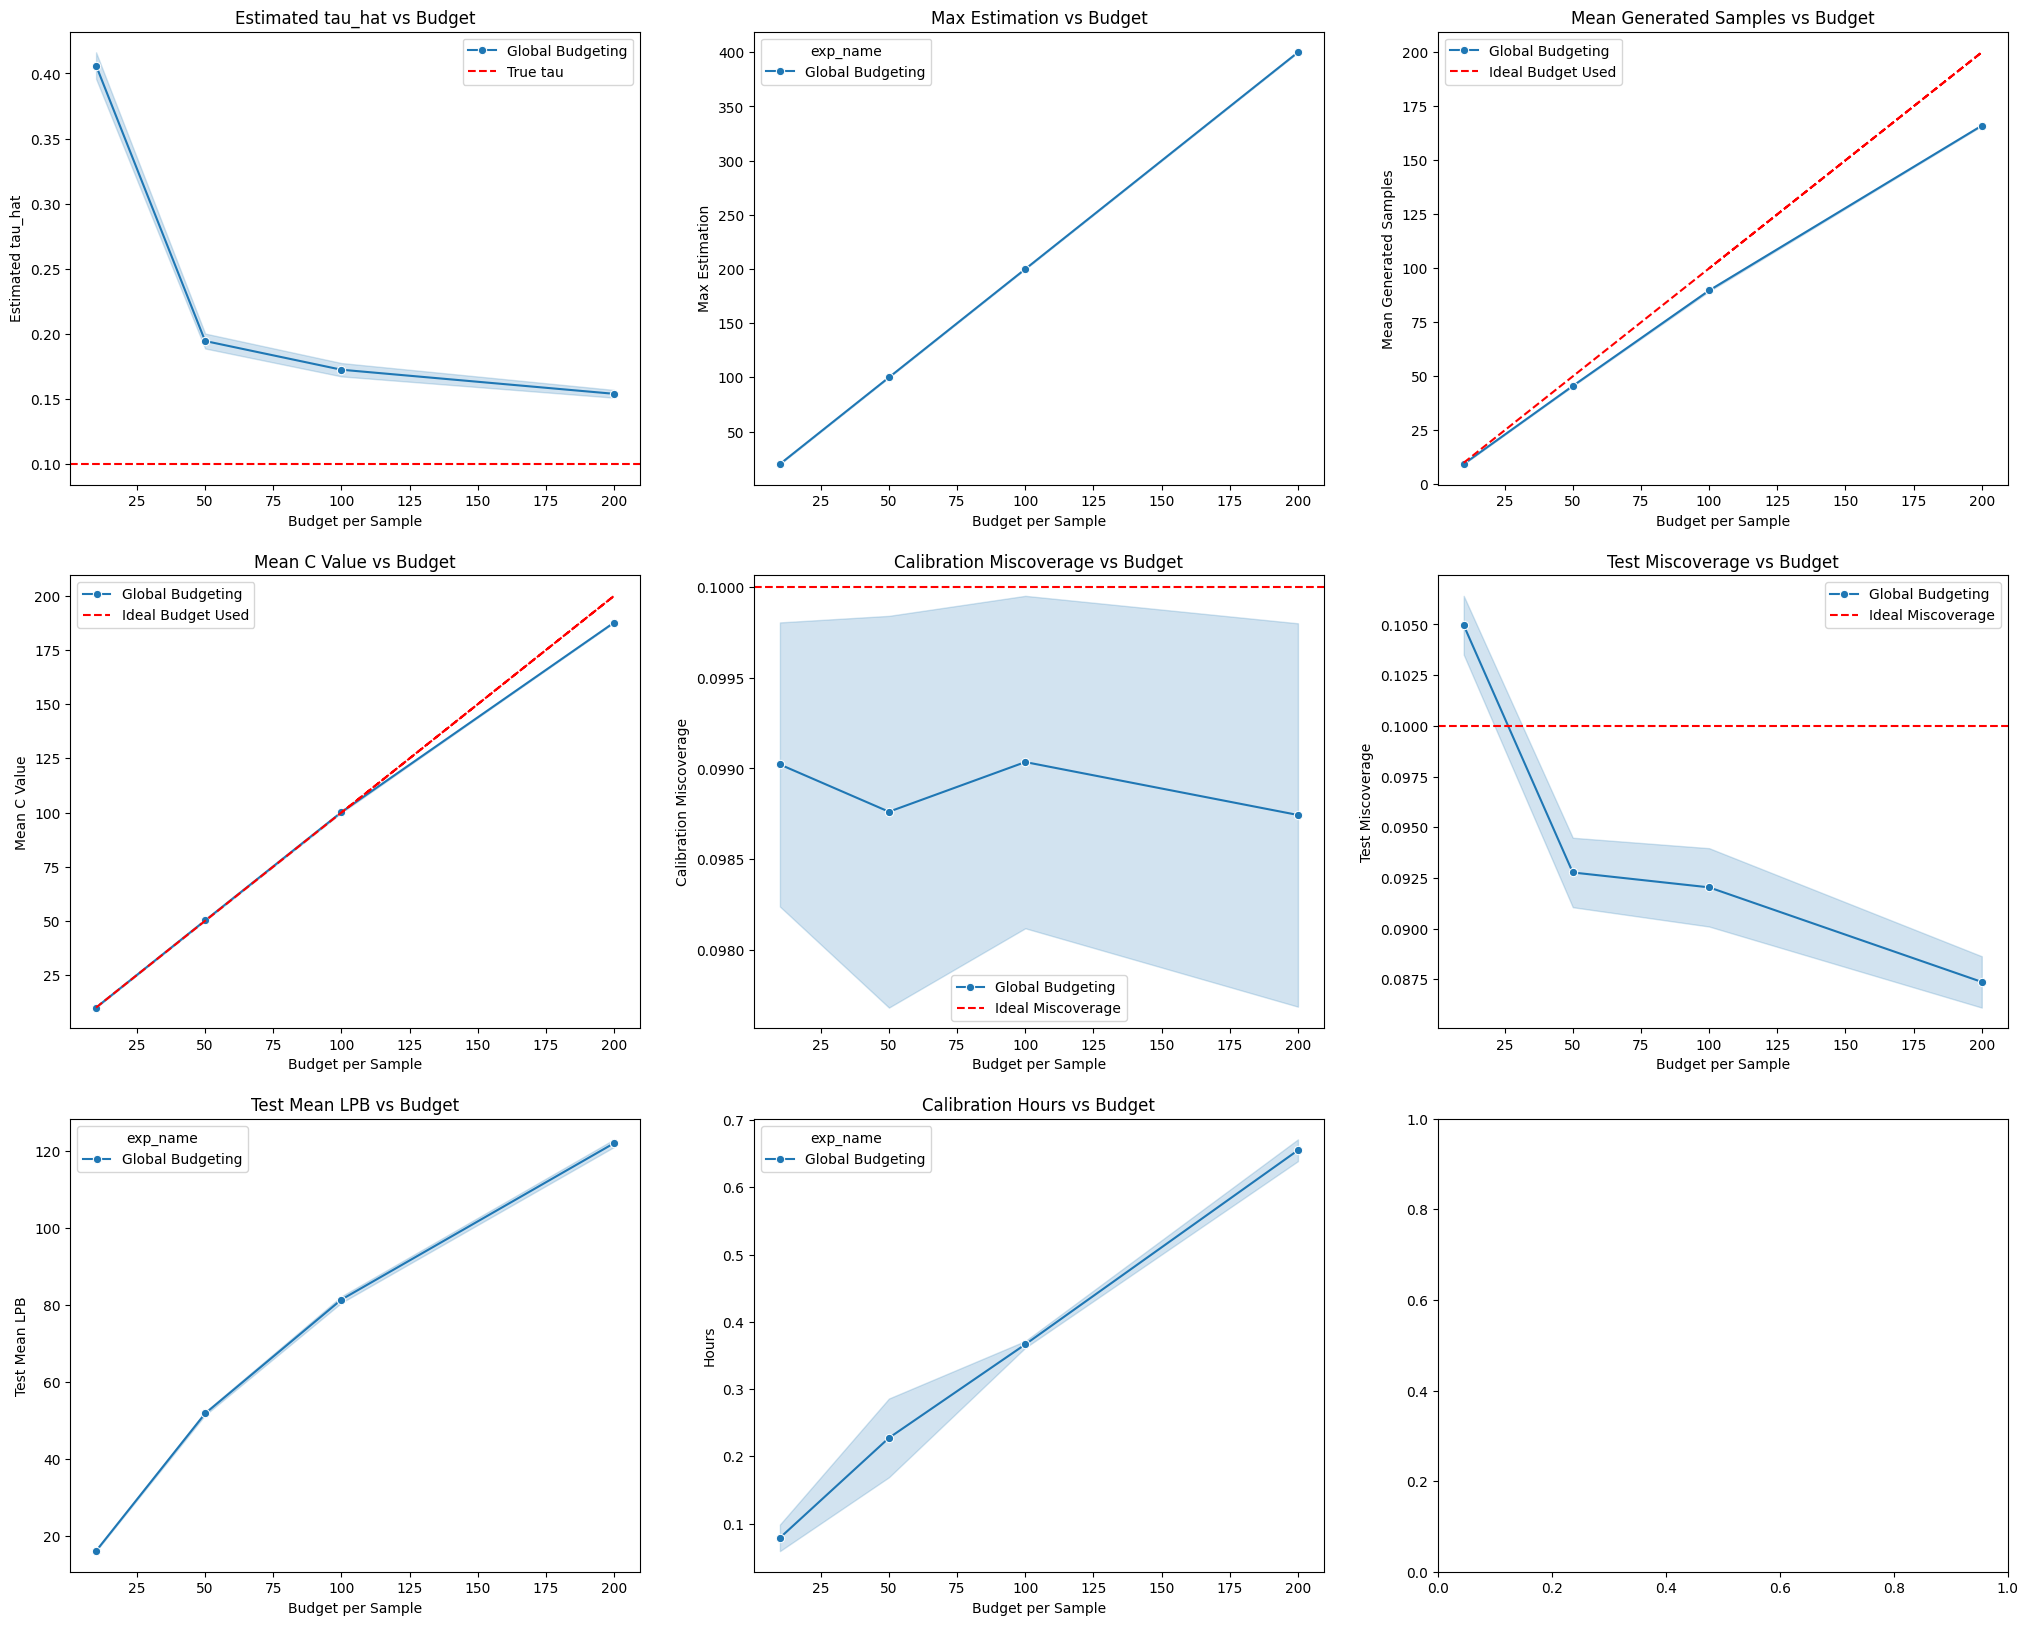

In [10]:
import seaborn as sns

# in all plots, the legend is exp_name
# the x axis in all plots is exp_budget
# for each y value create a distinct plot:
# 1. exp_budget vs the following: 'tau_hat', 'max_est', 'cal_mean_generated_samples', 'cal_mean_c_value', 'cal_miscoverage', 'test_miscoverage', 'test_mean_lpb', `cal_hours`

# use sns.lineplot to plot the results
def plot_results(x, y, title, xlabel, ylabel, ax = None) -> plt.Axes:
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create a line plot with confidence intervals
    ax = sns.lineplot(data=results, x=x, y=y, hue='exp_name', ax=ax, marker="o", errorbar="sd")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    return ax
    
fig, axes = plt.subplots(3, 3, figsize=(25, 20))
axes = axes.flatten()
        
# 1. exp_budget vs tau_hat
ax = plot_results('exp_budget', 'tau_hat', 'Estimated tau_hat vs Budget', 'Budget per Sample', 'Estimated tau_hat', ax=axes[0])
ax.axhline(y=0.1, color='r', linestyle='--', label='True tau')
ax.legend()

# 2. exp_budget vs max_est
plot_results('exp_budget', 'max_est', 'Max Estimation vs Budget', 'Budget per Sample', 'Max Estimation', ax=axes[1])

# 3. exp_budget vs cal_mean_generated_samples
ax = plot_results('exp_budget', 'cal_mean_generated_samples', 'Mean Generated Samples vs Budget', 'Budget per Sample', 'Mean Generated Samples', ax=axes[2])
ax.plot(results['exp_budget'].unique(), results['exp_budget'].unique(), color='red', linestyle='--', label='Ideal Budget Used')
ax.legend()

# 4. exp_budget vs cal_mean_c_value
ax = plot_results('exp_budget', 'cal_mean_c_value', 'Mean C Value vs Budget', 'Budget per Sample', 'Mean C Value', ax=axes[3])
ax.plot(results['exp_budget'].unique(), results['exp_budget'].unique(), color='red', linestyle='--', label='Ideal Budget Used')
ax.legend()

# 5. exp_budget vs cal_miscoverage
ax = plot_results('exp_budget', 'cal_miscoverage', 'Calibration Miscoverage vs Budget', 'Budget per Sample', 'Calibration Miscoverage', ax=axes[4])
ax.axhline(y=0.1, color='r', linestyle='--', label='Ideal Miscoverage')
ax.legend()

# 6. exp_budget vs test_miscoverage
ax = plot_results('exp_budget', 'test_miscoverage', 'Test Miscoverage vs Budget', 'Budget per Sample', 'Test Miscoverage', ax=axes[5])
ax.axhline(y=0.1, color='r', linestyle='--', label='Ideal Miscoverage')
ax.legend()

# 7. exp_budget vs test_mean_lpb
ax = plot_results('exp_budget', 'test_mean_lpb', 'Test Mean LPB vs Budget', 'Budget per Sample', 'Test Mean LPB', ax=axes[6])

# 8. exp_budget vs cal_hours
plot_results('exp_budget', 'cal_hours', 'Calibration Hours vs Budget', 'Budget per Sample', 'Hours', ax=axes[7])

plt.show()